# Model Evaluation (Titanic Dataset)

In this notebook, we will:
- Train the best-performing model fully on the training set
- Evaluate performance on the test set
- Compare metrics and visualize results
- Check feature importance for interpretation
- Make predictions for Kaggle test.csv and prepare submission

### Step 1: Set Project Root for Python Imports

In [1]:
import sys 
import os 

sys.path.append(os.path.abspath('..'))

### Step 2: Load Titanic dataset and display the shape of X

In [2]:
from src.data import load_data
df = load_data(r"D:\Thiru\ML_Projects\Titanic-Survival-Prediction\Data\processed\cleaned_titanic.csv")

from src.model import separate_X_Y, shape_x
X, Y=separate_X_Y(df)
X_train, X_test, Y_train, Y_test=shape_x(X, Y)

Training Samples (712, 9)
Testing Samples (179, 9)


### Step 2: Train the final model
we select **RandomForestClassifier** as our best model.

In [3]:
from src.model import final_model
Y_pred, Y_prob, model=final_model(X_train, Y_train, X_test)

**Explanation:**

- Random Forest is selected based on Algorithm-comparison notebook results.
- Trained on entire training set.
- `y_pred` = predicted classes, `y_prob` = probabilities for ROC/AUC.


### Step 3: Accuracy

In [4]:
from src.model import accuracy
accu=accuracy(Y_pred, Y_test)

Accuracy_Score:81.56


**Insight:**

- Measures overall correct predictions.
- Compare with Algorithm-comparison notebook cross-validation accuracy.

### Step 4: Confusion Matrix

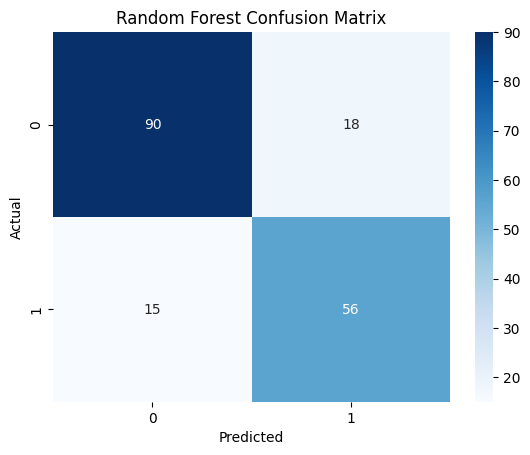

In [5]:
from src.model import plot_confusion_matrix
plot_confusion_matrix(Y_pred,Y_test)

**Insight:**

- Diagonal = correct predictions, off-diagonal = errors.
- Helps visualize prediction performance for survivors and non-survivors.

### Step 5: Classification Report

In [6]:
from src.model import clss_report
clss_report(Y_test, Y_pred)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



**Insight:**

- Precision, Recall, F1-score per class (0 = did not survive, 1 = survived).
- Helps understand model bias toward any class.

### Step 6: ROC Curve & AUC

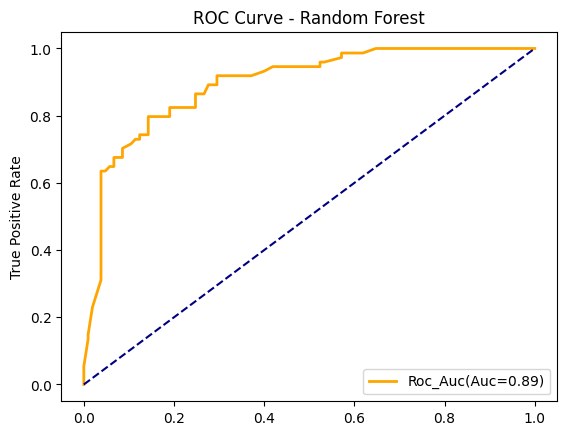

In [7]:
from src.model import roc_auc
roc_auc=roc_auc(Y_test, Y_prob)

**Insight:**

- ROC visualizes trade-off between True Positive Rate and False Positive Rate.
- AUC close to 1 = good discriminative ability.

### Step 7: Feature Importance

Features Columns: Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'FamilySize', 'IsAlone'],
      dtype='object')


Target Column Survived


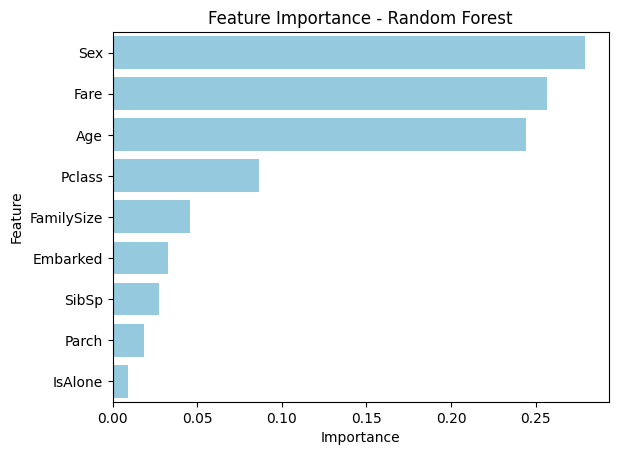

,Feature,Importance
1,Sex,0.279158
5,Fare,0.256530
2,Age,0.244242
0,Pclass,0.086586
7,FamilySize,0.045792
6,Embarked,0.032541
3,SibSp,0.027650
4,Parch,0.018509
8,IsAlone,0.008992


In [8]:

from src.model import imp_features, separate_x_y
X, Y=separate_x_y(df)
imp_features(X, model)

**Insight:**

- Shows which features influence survival most.
- Typically top features: Sex,, Fare, Age, Pclass.

### Step 8: Accuracy & AUC Table

In [9]:
from src.model import accu_auc_table
accu_auc_table(accu, roc_auc)

,Metric,Score
0,Accuracy,81.56
1,AUC,0.89


**Insight:**

- Quick summary table of model performance.
- Can include in reports or dashboards.

### Step 9: Kaggle Test Set Prediction & Submission

In [10]:
from src.model import kaggle_subm_set
kaggle_subm_set(r'D:\Thiru\ML_Projects\Titanic-Survival-Prediction\Data\Raw\test.csv',model)

**Insight:**

- `test.csv` has no target column, so we predict survival.
- Apply same preprocessing as training to avoid column mismatches.
- Submission file is ready for Kaggle.

### Step 10: Save model and Load model

In [11]:
from src.model import save_model, load_model

#Save model
save_model(model,r"D:\Thiru\ML_Projects\Titanic-Survival-Prediction\models.py\random_forest.pkl")

#load model
model=load_model(r"D:\Thiru\ML_Projects\Titanic-Survival-Prediction\models.py\random_forest.pkl")

model saved to D:\Thiru\ML_Projects\Titanic-Survival-Prediction\models.py\random_forest.pkl
model loaded from D:\Thiru\ML_Projects\Titanic-Survival-Prediction\models.py\random_forest.pkl


## Summary

- Final model: **RandomForestClassifier**
- Local Test Accuracy: ~81.56
- Confusion Matrix: Correct vs incorrect predictions visualized
- Classification Report: Precision, Recall, F1-score per class
- ROC Curve: AUC ~0.89
- Feature Importance: Top features – Sex, Fare, Age, Pclass
- Kaggle submission file (`submission.csv`) created successfully
- Model is ready for deployment, reporting, or further tuning